In [4]:
import numpy as np
import matplotlib.pyplot  as plt
from pathlib import Path
import struct
import math

In [5]:
train_img_path = "image/train-images.idx3-ubyte"
train_lab_path = 'image/train-labels.idx1-ubyte'
test_img_path = "image/t10k-images.idx3-ubyte"
test_lab_path = 'image/t10k-labels.idx1-ubyte'


train_img_f = open(train_img_path,'rb')
train_lab_f = open(train_lab_path,'rb')
test_img_f = open(test_img_path,'rb')
test_lab_f = open(test_lab_path,'rb')

In [6]:
struct.unpack('>4i',train_img_f.read(16))
struct.unpack('>ii',train_lab_f.read(8))
struct.unpack('>4i',test_img_f.read(16))
struct.unpack('>ii',test_lab_f.read(8))

train_imgs = np.fromfile(train_img_f,dtype=np.uint8).reshape(-1,28*28)
train_labs = np.fromfile(train_lab_f,dtype=np.uint8)
test_imgs = np.fromfile(test_img_f,dtype=np.uint8).reshape(-1,28*28)
test_labs = np.fromfile(test_lab_f,dtype=np.uint8)
print(test_labs)

[7 2 1 ... 4 5 6]


In [7]:
######## 定义sigmond函数
def sigmond(x):
    return 1/(1+np.exp(-np.abs(x)))

In [13]:
#################读取w1 与w2##################################
w1 = np.loadtxt("init_w1.txt",delimiter=',')
w2 = np.loadtxt("init_w2.txt",delimiter=',')
#################根据文件内容，初始化w1与w2#####################

######### 设置学习率 
n = 0.8
#print(w2[0:10,:])
print(w1[0:10,0:5])
print(w2[0:10,0:5])

[[-0.13831245 -1.12110982  0.86680081 -0.99932069 -0.57734748]
 [ 0.97628416  0.29283071 -0.37299802 -0.76365585  0.68640665]
 [-0.97515028  0.54765939 -0.24836897  0.89859248 -0.62399037]
 [-0.02021585  0.99135204  0.58178391  0.44086144  0.55020497]
 [ 0.53866845 -0.09911446 -0.80688249  0.47300228 -0.17906463]
 [-0.43443602 -0.34040003  0.21176619  0.00648955 -0.34141439]
 [-0.71498335  0.95842872  0.63543479  0.33511949 -0.2894329 ]
 [ 0.1088074   0.12551202 -0.16635887 -0.09112119 -0.55228324]
 [-0.85010041  0.26681826  0.16950371 -0.34897403  0.10585378]
 [ 0.69206514  0.31147757 -0.11788205  0.01255997 -0.58509646]]
[[ 9.36912444e-01 -6.33431134e-01 -8.83651766e-01 -4.68133206e-01
   7.89564303e-02]
 [-1.29120946e+00 -4.58179754e-01  4.23862978e-01  1.28053984e+00
   2.45055868e-01]
 [-4.10596402e-01  3.02399117e-01 -2.35238695e-01  3.26609441e-01
  -1.55079326e-01]
 [-7.51081783e-01 -9.05268018e-02  3.36470873e-02 -1.00248536e+00
   6.28667403e-01]
 [-2.23035366e-01  6.16980669

In [8]:
############整理train_labs，使其变成 60000*10#################
y = np.zeros((60000,10))
for i in range(y.shape[0]):
    y[i][train_labs[i]]=1
print(y.shape)
print(y[0:10,:])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


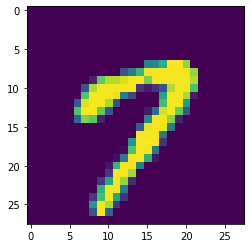

In [9]:
####### 显示图片测试 
def img_show(i):
    print(y[i])
    plt.imshow(train_imgs[i].reshape(28,28))
    
img_show(15)

In [10]:
def sigmond(x):
    return 1/(1+np.exp(-np.abs(x)))

def reLu(x):
    return (np.abs(x)+x) / 2.0

def d_reLu(x):
    x[x<=0] = 0
    x[x>1] = 1
    return x

def softmax(x):
    x_row_max = x.max(axis=1).reshape(x.shape[0],1)
    x = x - x_row_max
    x_exp = np.exp(x)
    x_row_exp_sum = x_exp.sum(axis=1).reshape(x.shape[0],1)
    x_softmax = x_exp / x_row_exp_sum
    return x_softmax

def softmax_vector(x):
    x_exp = np.exp(x-x.max())
    return x_exp / x_exp.sum()

In [11]:
def J_softmax(h,y):
    a = 1e-10
    b = y*np.log(h+a)
    return b.sum() / 60000

In [15]:
#####################开始训练传播##################
x = train_imgs / 255
x = np.insert(x,0,1,axis=1)
for i in range(1000):
    ######## x.shape = 60000*784 ############
    
    ######## x.shape = 60000*785  ############
    
    ############ 隐藏层输入 ############
    hid_input = np.matmul(x,w1)
    ######## hid_input.shape = 60000*785 ############
    
    ############ 隐藏层输出 ############
    hid_output = reLu(hid_input)
    ######## hid_output.shape = 60000*392 ############
    
    ######## 为隐藏层增加偏执项 ############
    hid_output = np.insert(hid_output,0,1,axis=1)
    ######## hid_output.shape = 60000*393 ############
    
    ############ 最后一层的输入 ############
    hpfs_input = np.matmul(hid_output,w2)
    ######## hpfs_input.shape = 60000*10 ############
    
     ############ 最后一层的输出，即正向传播的输出值 ############
    hpfs_output = softmax(hpfs_input)
    #print(hpfs_output.shape)
    ######## hpfs_output.shape = 60000*10 ############
    ############ 完成正向传播 ############
    
    """ 
    ####################### 下面是 用reLu 和 sigmond 的情况 ###########################
    ############ w2的权重误差计算 #######################
    d_cost_hyfs_input = hpfs_output - y
    d_cost_w2 = np.matmul(hid_output.T,d_cost_hyfs_input) / 60000
    #print(d_cost_w2.shape)
    #print(d_cost_w2[100:220,:])
    ######## d_cost_w2.shape = 393*10 ############
    
    ############ w1的权重误差计算 #######################
    ############ d_cost_w1 = {[(h-y)·w2] * hid_out*(1-hid_out)}·x #####################
    ############ d_cost_hid_out = (h-y)·w2  shape=m*393 #####################
    ############ 在使用 reLu的情况下， d_cost_hid
    d_cost_hid_out = np.matmul(d_cost_hyfs_input,w2.T)
    #d_cost_hid_input = d_cost_hid_out*hid_output*(1-hid_output) ###隐藏层输入为sigmond的情况下 shape = 60000*393
    d_cost_hid_input = d_cost_hid_out*d_reLu(hid_output)         ####隐藏层输入为reLu的情况下 shape = 60000*393
    #print(d_cost_hid_input.shape)
    d_cost_hid_input = np.delete(d_cost_hid_input,0,axis=1)
    #print(d_cost_hid_input.shape)###### shape = 60000*392
    d_cost_w1 = np.matmul(x.T,d_cost_hid_input) / 60000
    ######## d_cost_w1.shape = 785*393 ############
    #print(d_cost_w1.shape)
    #print(d_cost_w1[0:20,:])
    ####################### 下面是 用reLu 和 sigmond 的情况 ###########################
    """
    
    ####################### 下面是 用reLu 和 softmax 的情况 ###########################
    ####### dL/dwij = (h_outj -yj)*ai
    d_cost_hyfs_input = hpfs_output - y
    d_cost_w2 = np.matmul(hid_output.T,d_cost_hyfs_input) / 60000  ##shape is 801*10
    #print(d_cost_w2.shape)
    d_cost_hid_out = np.matmul(d_cost_hyfs_input,w2.T)   ### shape is m*801
    #print(d_cost_hid_out.shape)
    #d_cost_hid_input = d_cost_hid_out*hid_output*(1-hid_output) ###隐藏层输入为sigmond的情况下 shape = 60000*801
    d_cost_hid_input = d_cost_hid_out*d_reLu(hid_output) ### shape is m*801
    #print(d_cost_hid_input.shape)
    d_cost_hid_input = np.delete(d_cost_hid_input,0,axis=1) ### shape is m*800
    #print(d_cost_hid_input.shape)
    d_cost_w1 = np.matmul(x.T,d_cost_hid_input) / 60000
    #print(d_cost_w1.shape)
    
    
    ####################### 下面是 用reLu 和 softmax 的情况 ###########################
    
    
    ######################## 上面代码完成反向传播计算 #########################
    ###########更新权重###################
    w1 = w1 - n*d_cost_w1
    w2 = w2 - n*d_cost_w2
    np.savetxt("init_w1.txt",w1,delimiter=',')
    np.savetxt("init_w2.txt",w2,delimiter=',')
    #print('d_w1 max index is ',np.where(d_cost_w1==np.max(d_cost_w1)))
    #print('d_w1 max is ',np.max(d_cost_w1))
    #print('w1 max index is ',np.where(w1==np.max(w1)))
    #print('w1 max is ',np.max(w1))
    if (i % 5 == 0) :
        print("J = ",J_softmax(hpfs_output,y))
        print(hpfs_output[0:1,:])
        print("-----------------count ",i,"------------------")
    #print("-----------------count ",i,"------------------")

J =  -0.28485493359944014
[[3.80568750e-09 1.51301553e-07 3.01707683e-01 6.73243272e-01
  4.24827816e-15 1.08582979e-04 2.29831807e-04 8.38411509e-10
  2.78513095e-11 2.47104743e-02]]
-----------------count  0 ------------------
J =  -0.2799856042120228
[[4.03656105e-09 1.63683028e-07 2.90876104e-01 6.84386849e-01
  4.41802282e-15 1.27172271e-04 2.28273647e-04 9.21149546e-10
  3.08723747e-11 2.43814329e-02]]
-----------------count  5 ------------------


KeyboardInterrupt: 

In [154]:
print(w1[0:10,0:5])
print(w2[0:10,0:5])

[[-0.13831245 -1.12110982  0.86680081 -0.99932069 -0.57734748]
 [ 0.97628416  0.29283071 -0.37299802 -0.76365585  0.68640665]
 [-0.97515028  0.54765939 -0.24836897  0.89859248 -0.62399037]
 [-0.02021585  0.99135204  0.58178391  0.44086144  0.55020497]
 [ 0.53866845 -0.09911446 -0.80688249  0.47300228 -0.17906463]
 [-0.43443602 -0.34040003  0.21176619  0.00648955 -0.34141439]
 [-0.71498335  0.95842872  0.63543479  0.33511949 -0.2894329 ]
 [ 0.1088074   0.12551202 -0.16635887 -0.09112119 -0.55228324]
 [-0.85010041  0.26681826  0.16950371 -0.34897403  0.10585378]
 [ 0.69206514  0.31147757 -0.11788205  0.01255997 -0.58509646]]
[[ 9.36912444e-01 -6.33431134e-01 -8.83651766e-01 -4.68133206e-01
   7.89564303e-02]
 [-1.29120946e+00 -4.58179754e-01  4.23862978e-01  1.28053984e+00
   2.45055868e-01]
 [-4.10596402e-01  3.02399117e-01 -2.35238695e-01  3.26609441e-01
  -1.55079326e-01]
 [-7.51081783e-01 -9.05268018e-02  3.36470873e-02 -1.00248536e+00
   6.28667403e-01]
 [-2.23035366e-01  6.16980669

In [155]:
fail_array = np.array([[0,0]])
for i in range(len(test_imgs)):
    x = test_imgs[i].reshape(1,-1) / 255 
    #plt.imshow(x.reshape(28,28))
    #break
    x = np.insert(x,0,1,axis=1)
    #print(x.sum())
    #print(x[0:10,:])
    hid_input = np.matmul(x,w1)
    hid_output = reLu(hid_input)
    #print(hid_output)
    hid_output = np.insert(hid_output,0,1,axis=1)
    hpfs_input = np.matmul(hid_output,w2)
    hpfs_output = softmax_vector(hpfs_input)
    
    #print(hpfs_input.shape)
    #print(hpfs_input)
    #print(hpfs_output.reshape(-1,1))
    test_out = hpfs_output.argmax()
    if test_labs[i] != test_out:
        print('test lab is ',test_labs[i])
        print('test output is ',np.where(hpfs_output==np.max(hpfs_output)))
        fail_array = np.append(fail_array,[[i,test_out]])

print('----------------test done----------------')

test lab is  5
test output is  (array([0]), array([6]))
test lab is  3
test output is  (array([0]), array([2]))
test lab is  5
test output is  (array([0]), array([8]))
test lab is  8
test output is  (array([0]), array([2]))
test lab is  3
test output is  (array([0]), array([2]))
test lab is  7
test output is  (array([0]), array([9]))
test lab is  4
test output is  (array([0]), array([9]))
test lab is  7
test output is  (array([0]), array([4]))
test lab is  2
test output is  (array([0]), array([6]))
test lab is  9
test output is  (array([0]), array([8]))
test lab is  6
test output is  (array([0]), array([4]))
test lab is  7
test output is  (array([0]), array([8]))
test lab is  9
test output is  (array([0]), array([5]))
test lab is  2
test output is  (array([0]), array([3]))
test lab is  3
test output is  (array([0]), array([5]))
test lab is  5
test output is  (array([0]), array([7]))
test lab is  3
test output is  (array([0]), array([5]))
test lab is  3
test output is  (array([0]), arra

test lab is  6
test output is  (array([0]), array([2]))
test lab is  0
test output is  (array([0]), array([6]))
test lab is  8
test output is  (array([0]), array([5]))
test lab is  7
test output is  (array([0]), array([9]))
test lab is  8
test output is  (array([0]), array([3]))
test lab is  9
test output is  (array([0]), array([7]))
test lab is  3
test output is  (array([0]), array([7]))
test lab is  2
test output is  (array([0]), array([6]))
test lab is  3
test output is  (array([0]), array([2]))
test lab is  0
test output is  (array([0]), array([6]))
test lab is  6
test output is  (array([0]), array([5]))
test lab is  3
test output is  (array([0]), array([9]))
test lab is  2
test output is  (array([0]), array([0]))
test lab is  9
test output is  (array([0]), array([5]))
test lab is  7
test output is  (array([0]), array([1]))
test lab is  8
test output is  (array([0]), array([0]))
test lab is  7
test output is  (array([0]), array([3]))
test lab is  3
test output is  (array([0]), arra

test lab is  9
test output is  (array([0]), array([4]))
test lab is  8
test output is  (array([0]), array([3]))
test lab is  7
test output is  (array([0]), array([1]))
test lab is  7
test output is  (array([0]), array([4]))
test lab is  8
test output is  (array([0]), array([3]))
test lab is  2
test output is  (array([0]), array([3]))
test lab is  7
test output is  (array([0]), array([9]))
test lab is  5
test output is  (array([0]), array([0]))
test lab is  7
test output is  (array([0]), array([9]))
test lab is  4
test output is  (array([0]), array([6]))
test lab is  6
test output is  (array([0]), array([8]))
test lab is  2
test output is  (array([0]), array([6]))
test lab is  5
test output is  (array([0]), array([8]))
test lab is  4
test output is  (array([0]), array([9]))
test lab is  6
test output is  (array([0]), array([0]))
test lab is  7
test output is  (array([0]), array([2]))
test lab is  2
test output is  (array([0]), array([6]))
test lab is  4
test output is  (array([0]), arra

test lab is  4
test output is  (array([0]), array([9]))
test lab is  0
test output is  (array([0]), array([8]))
test lab is  2
test output is  (array([0]), array([7]))
test lab is  2
test output is  (array([0]), array([3]))
test lab is  8
test output is  (array([0]), array([4]))
test lab is  9
test output is  (array([0]), array([4]))
test lab is  7
test output is  (array([0]), array([8]))
test lab is  8
test output is  (array([0]), array([7]))
test lab is  4
test output is  (array([0]), array([6]))
test lab is  3
test output is  (array([0]), array([8]))
test lab is  3
test output is  (array([0]), array([0]))
test lab is  6
test output is  (array([0]), array([8]))
test lab is  9
test output is  (array([0]), array([7]))
test lab is  8
test output is  (array([0]), array([5]))
test lab is  0
test output is  (array([0]), array([6]))
test lab is  9
test output is  (array([0]), array([4]))
test lab is  3
test output is  (array([0]), array([8]))
test lab is  8
test output is  (array([0]), arra

test lab is  9
test output is  (array([0]), array([4]))
test lab is  8
test output is  (array([0]), array([0]))
test lab is  8
test output is  (array([0]), array([9]))
test lab is  1
test output is  (array([0]), array([8]))
test lab is  2
test output is  (array([0]), array([6]))
test lab is  0
test output is  (array([0]), array([6]))
test lab is  4
test output is  (array([0]), array([6]))
test lab is  2
test output is  (array([0]), array([8]))
test lab is  9
test output is  (array([0]), array([8]))
test lab is  8
test output is  (array([0]), array([5]))
test lab is  9
test output is  (array([0]), array([4]))
test lab is  6
test output is  (array([0]), array([2]))
test lab is  3
test output is  (array([0]), array([5]))
test lab is  9
test output is  (array([0]), array([0]))
test lab is  6
test output is  (array([0]), array([0]))
test lab is  6
test output is  (array([0]), array([8]))
test lab is  3
test output is  (array([0]), array([8]))
test lab is  3
test output is  (array([0]), arra

In [156]:
fail_array = fail_array.reshape(-1,2)
fail_array = np.delete(fail_array,0,axis=0)
print(fail_array.shape)

(807, 2)


In [157]:
fail_array[1]

array([44,  2])

In [158]:
def show_fail(i):
    print(test_labs[fail_array[i,0]])
    print('my predict is ',fail_array[i,1])
    plt.imshow(test_imgs[fail_array[i,0]].reshape(28,28))

6
my predict is  8


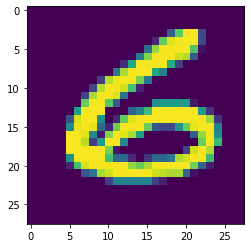

In [168]:
show_fail(np.random.randint(807))